In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in the csv file
conviction_df = pd.read_csv("allstates_monthly_2020_2021.csv")
conviction_df


,state,type,GEOID,month,filings,filings_avg,last_updated
0,connecticut,Census Tract,09001010101,01/2020,0,0.000000,2023-01-07
1,connecticut,Census Tract,09001010101,02/2020,0,0.666667,2023-01-07
2,connecticut,Census Tract,09001010101,03/2020,0,0.666667,2023-01-07
3,connecticut,Census Tract,09001010101,04/2020,0,0.000000,2023-01-07
4,connecticut,Census Tract,09001010101,05/2020,0,0.000000,2023-01-07
...,...,...,...,...,...,...,...
456390,wisconsin,Census Tract,sealed,09/2022,63,3.666667,2023-01-07
456391,wisconsin,Census Tract,sealed,10/2022,41,2.000000,2023-01-07
456392,wisconsin,Census Tract,sealed,11/2022,50,1.666667,2023-01-07
456393,wisconsin,Census Tract,sealed,12/2022,31,5.666667,2023-01-07


In [4]:
conviction_df['month']

0         01/2020
1         02/2020
2         03/2020
3         04/2020
4         05/2020
           ...   
456390    09/2022
456391    10/2022
456392    11/2022
456393    12/2022
456394    01/2023
Name: month, Length: 456395, dtype: object

In [5]:
# Read in the csv file
CT_df = pd.read_csv("CT_temp.csv")
CT_df

,Date,MeanAvgTemperature,HighestMaxTemperature,LowestMinTemperature
0,2020-01,34.6,70,7
1,2020-02,35.6,62,10
2,2020-03,44.1,73,20
3,2020-04,47.1,67,27
4,2020-05,59.5,82,34
5,2020-06,72.4,92,43
6,2020-07,79.3,98,62
7,2020-08,76.1,95,52
8,2020-09,66.8,87,36
9,2020-10,55.5,78,24


In [6]:
MN_df = pd.read_csv("MN_temp.csv")
MN_df.head(10)


,Date,MeanAvgTemperature,HighestMaxTemperature,LowestMinTemperature
0,2020-01,20.4,37,-8
1,2020-02,20.2,43,-10
2,2020-03,35.8,58,17
3,2020-04,43.4,72,21
4,2020-05,58.2,80,35
5,2020-06,71.5,95,50
6,2020-07,75.7,93,58
7,2020-08,72.4,91,55
8,2020-09,60.2,83,39
9,2020-10,42.9,78,17


In [7]:
MN_df = pd.read_csv("MN_temp.csv")
CT_df = pd.read_csv("CT_temp.csv")
IN_df = pd.read_csv("IN_temp.csv")
VA_df = pd.read_csv("VA_temp.csv")
DE_df = pd.read_csv("DE_temp.csv")
PA_df = pd.read_csv("PA_temp.csv")
MO_df = pd.read_csv("MO_temp.csv")
NM_df = pd.read_csv("NM_temp.csv")
WI_df = pd.read_csv("WI_temp.csv")

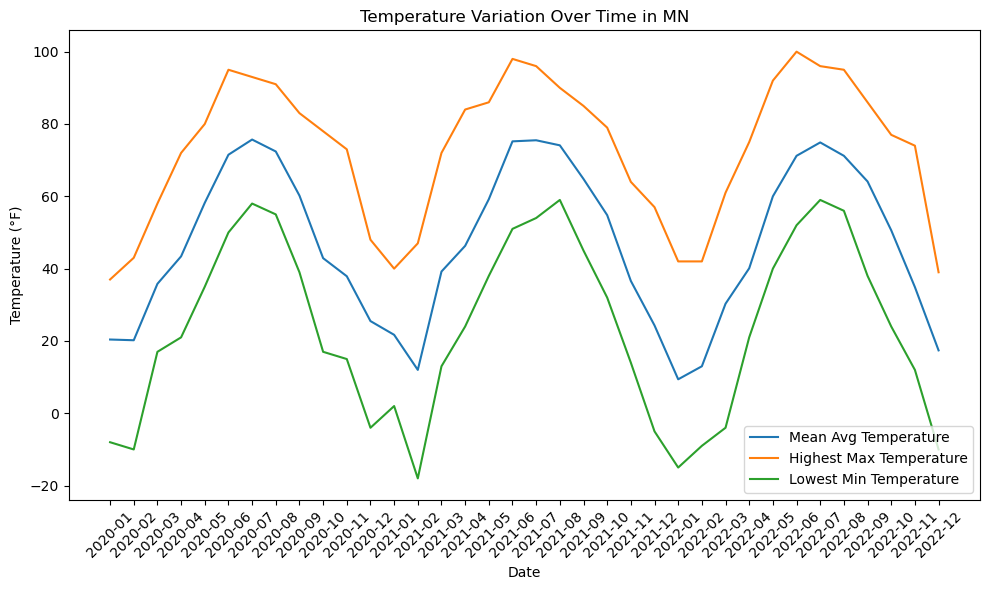

In [8]:
#try to make linegraph for a state
plt.figure(figsize=(10, 6))

# Plotting MeanAvgTemperature
plt.plot(MN_df['Date'], MN_df['MeanAvgTemperature'], label='Mean Avg Temperature')

# # Plotting HighestMaxTemperature
plt.plot(MN_df['Date'], MN_df['HighestMaxTemperature'], label='Highest Max Temperature')

# # Plotting LowestMinTemperature
plt.plot(MN_df['Date'], MN_df['LowestMinTemperature'], label='Lowest Min Temperature')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Variation Over Time in MN')
plt.legend()  # Show legend

# Rotating x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


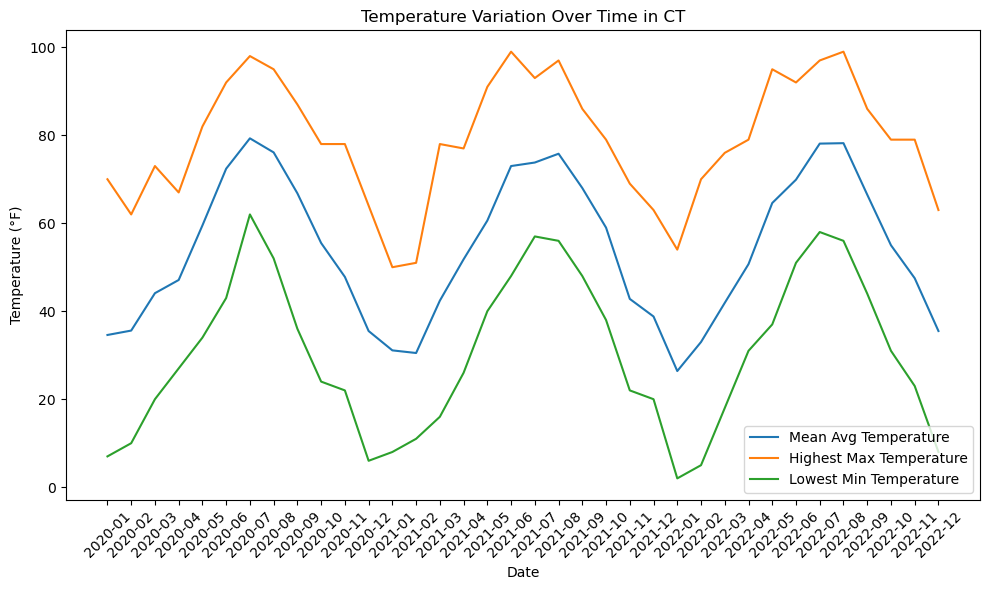

In [9]:
#try to make linegraph for a state
plt.figure(figsize=(10, 6))

# Plotting MeanAvgTemperature
plt.plot(CT_df['Date'], CT_df['MeanAvgTemperature'], label='Mean Avg Temperature')

# # Plotting HighestMaxTemperature
plt.plot(CT_df['Date'], CT_df['HighestMaxTemperature'], label='Highest Max Temperature')

# # Plotting LowestMinTemperature
plt.plot(CT_df['Date'], CT_df['LowestMinTemperature'], label='Lowest Min Temperature')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Temperature Variation Over Time in CT')
plt.legend()  # Show legend

# Rotating x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [10]:
# Merge the DataFrames on the 'Date' column
merged_df = pd.merge(MN_df[['Date', 'MeanAvgTemperature']], CT_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_MN', '_CT'))
merged_df = pd.merge(merged_df, IN_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_MN', '_IN'))
merged_df = pd.merge(merged_df, VA_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_IN', '_VA'))
merged_df = pd.merge(merged_df, DE_df[['Date', 'MeanAvgTemperature']], on='Date', suffixes=('_VA', '_DE'))
merged_df = pd.merge(merged_df, PA_df[['Date', 'MeanAvgTemperature']], on='Date')
merged_df = pd.merge(merged_df, MO_df[['Date', 'MeanAvgTemperature']], on='Date')
merged_df = pd.merge(merged_df, NM_df[['Date', 'MeanAvgTemperature']], on='Date')
merged_df = pd.merge(merged_df, WI_df[['Date', 'MeanAvgTemperature']], on='Date')

# Rename columns to represent their respective states
merged_df.columns = ['Date', 'MeanAvgTemperature_MN', 'MeanAvgTemperature_CT', 'MeanAvgTemperature_IN',
                     'MeanAvgTemperature_VA', 'MeanAvgTemperature_DE', 'MeanAvgTemperature_PA',
                     'MeanAvgTemperature_MO', 'MeanAvgTemperature_NM', 'MeanAvgTemperature_WI']

# Display the combined DataFrame
merged_df.head(10)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_15692\1076356190.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'MeanAvgTemperature_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, NM_df[['Date', 'MeanAvgTemperature']], on='Date')


,Date,MeanAvgTemperature_MN,MeanAvgTemperature_CT,MeanAvgTemperature_IN,MeanAvgTemperature_VA,MeanAvgTemperature_DE,MeanAvgTemperature_PA,MeanAvgTemperature_MO,MeanAvgTemperature_NM,MeanAvgTemperature_WI
0,2020-01,20.4,34.6,35.0,43.2,37.8,34.8,35.6,30.7,25.9
1,2020-02,20.2,35.6,33.3,45.0,39.5,36.4,38.2,33.7,24.7
2,2020-03,35.8,44.1,46.2,54.8,47.3,44.4,50.4,43.4,38.3
3,2020-04,43.4,47.1,50.8,56.9,49.4,47.8,54.9,49.8,45.6
4,2020-05,58.2,59.5,60.7,63.8,58.5,58.9,64.0,60.0,57.0
5,2020-06,71.5,72.4,73.7,75.3,72.3,69.4,77.1,67.4,68.8
6,2020-07,75.7,79.3,78.4,82.9,79.1,79.1,81.1,72.0,75.5
7,2020-08,72.4,76.1,74.1,79.2,76.1,75.3,75.8,72.0,72.0
8,2020-09,60.2,66.8,67.8,69.7,66.9,64.6,69.0,61.4,61.3
9,2020-10,42.9,55.5,54.7,62.3,58.4,53.7,54.6,52.3,47.3


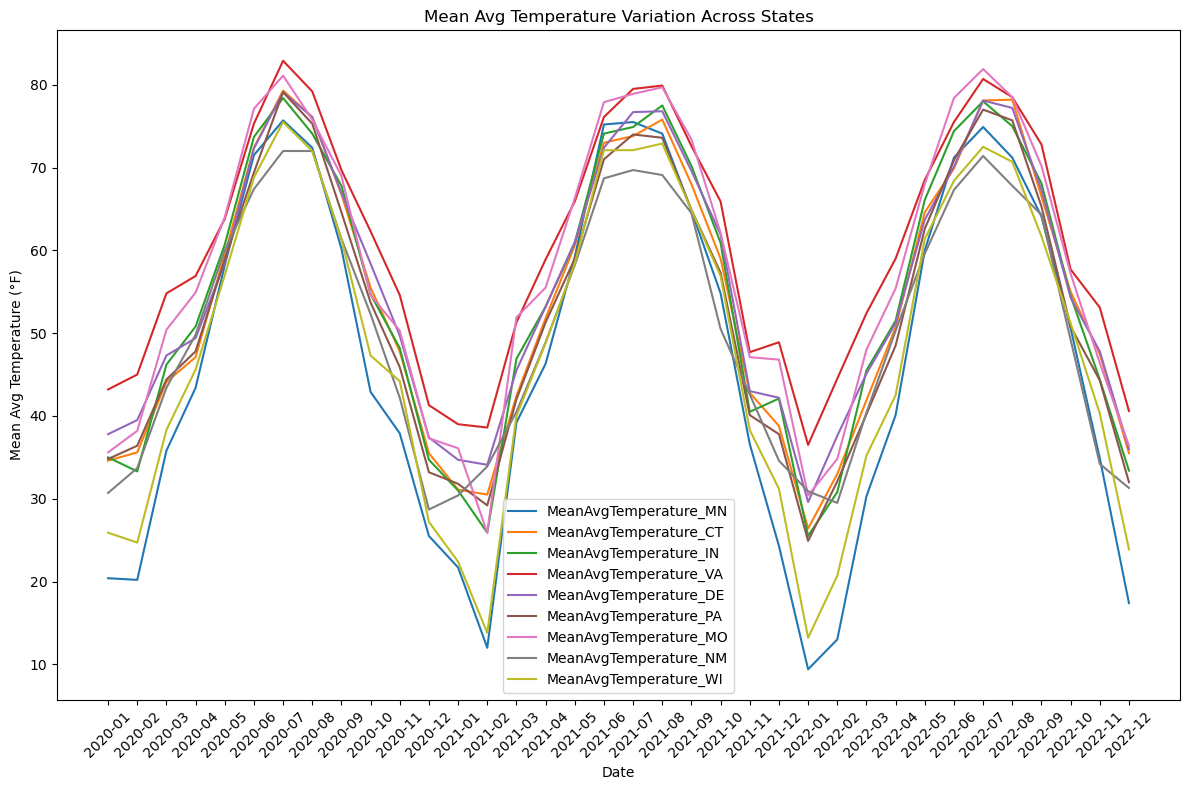

In [11]:
# Plotting the graph
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Plotting each state's MeanAvgTemperature as a separate line
for column in merged_df.columns[1:]:  # Exclude 'Date' column
    plt.plot(merged_df['Date'], merged_df[column], label=column)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Mean Avg Temperature (°F)')
plt.title('Mean Avg Temperature Variation Across States')
plt.legend()  # Show legend

# Rotating x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [13]:
new_df = conviction_df.groupby(['state', 'month'], as_index=False)['filings'].sum()
new_df

,state,month,filings
0,connecticut,01/2020,1641
1,connecticut,01/2021,550
2,connecticut,01/2022,1243
3,connecticut,01/2023,280
4,connecticut,02/2020,1450
...,...,...,...
328,wisconsin,11/2021,1691
329,wisconsin,11/2022,2089
330,wisconsin,12/2020,1504
331,wisconsin,12/2021,1804


In [14]:
# Convert 'Date' column to datetime format with the current format '01/2020'
new_df['month'] = pd.to_datetime(new_df['month'], format='%m/%Y')

# Convert the 'Date' column back to string with the desired format 'YYYY-MM'
new_df['month'] = new_df['month'].dt.strftime('%Y-%m')

# Displaying the modified DataFrame
new_df

,state,month,filings
0,connecticut,2020-01,1641
1,connecticut,2021-01,550
2,connecticut,2022-01,1243
3,connecticut,2023-01,280
4,connecticut,2020-02,1450
...,...,...,...
328,wisconsin,2021-11,1691
329,wisconsin,2022-11,2089
330,wisconsin,2020-12,1504
331,wisconsin,2021-12,1804


In [15]:
filtered_df = new_df[new_df['month'] != '2023-01']
filtered_df

,state,month,filings
0,connecticut,2020-01,1641
1,connecticut,2021-01,550
2,connecticut,2022-01,1243
4,connecticut,2020-02,1450
5,connecticut,2021-02,595
...,...,...,...
328,wisconsin,2021-11,1691
329,wisconsin,2022-11,2089
330,wisconsin,2020-12,1504
331,wisconsin,2021-12,1804


In [19]:
unique_states = filtered_df['state'].unique()

# Create separate DataFrames for each unique state
for state in unique_states:
    globals()[f"{state}_df"] = filtered_df[filtered_df['state'] == state].copy()
    globals()[f"{state}_df"] = globals()[f"{state}_df"].reset_index(drop=True)

# Accessing individual state DataFrames:

print(connecticut_df)
print(wisconsin_df)
print(missouri_df)


          state    month  filings
0   connecticut  2020-01     1641
1   connecticut  2021-01      550
2   connecticut  2022-01     1243
3   connecticut  2020-02     1450
4   connecticut  2021-02      595
5   connecticut  2022-02     1174
6   connecticut  2020-03     1238
7   connecticut  2021-03      879
8   connecticut  2022-03     2490
9   connecticut  2020-04      167
10  connecticut  2021-04      724
11  connecticut  2022-04     2139
12  connecticut  2020-05       23
13  connecticut  2021-05      610
14  connecticut  2022-05     1995
15  connecticut  2020-06       29
16  connecticut  2021-06      694
17  connecticut  2022-06     2056
18  connecticut  2020-07      154
19  connecticut  2021-07      391
20  connecticut  2022-07     1976
21  connecticut  2020-08      135
22  connecticut  2021-08      556
23  connecticut  2022-08     2087
24  connecticut  2020-09      192
25  connecticut  2021-09     1041
26  connecticut  2022-09     1959
27  connecticut  2020-10      302
28  connecticu